<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|13 de mayo 2020|

# Data science Poject
---

**Autor:** Ken Jee  

**Titulo:** Salary Cleanned project

[salary cleanned project](https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py)

**Descripción:**  
Análisis de datos exploratorio(***EDA***).

<video controls scr="https://www.youtube.com/watch?v=QWgg4w1SpJ8"/>

---
## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

cargaremos el archivo el cual limpiamos con aterioridad **Salary_data_cleaned.csv**, Le realizaremos  
algunos arreglos y luego haremos el proceso de EDA

In [2]:
df = pd.read_csv('Salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,city,state,Salary,salario_min,salario_max,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Albuquerque,NM,$53-$91,$53,$90,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Linthicum,MD,$63-$112,$63,$002,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,Clearwater,FL,$80-$90,$80,$90,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,Richland,WA,$56-$97,$56,$97,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,New York,NY,$86-$143,$86,$043,1,0,0,0,1


In [3]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
city                  object
state                 object
Salary                object
salario_min           object
salario_max           object
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object

## Arreglo de columnas:
---
- State
- Job Title
- Competitors
- Company Name

In [10]:
df['state'] = df.state.replace('Los Angeles', 'LA')
df.state.value_counts()

CA    210
MA    124
NY     96
VA     56
IL     48
PA     41
TX     39
MD     37
WA     25
NJ     22
FL     21
NC     21
TN     18
UT     18
GA     16
OH     14
CO     13
AZ     13
DC     12
MO     11
WI     10
IN     10
MI      9
AL      9
DE      6
KY      6
NE      5
CT      5
IA      5
LA      5
OR      4
MN      4
NM      3
KS      3
RI      2
ID      2
SC      1
PR      1
AK      1
Name: state, dtype: int64

In [12]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [14]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    358
na                238
data engineer     158
analyst           124
manager            36
mle                26
director           16
Name: job_simp, dtype: int64

In [15]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        688
senior    266
jr          2
Name: seniority, dtype: int64

In [17]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp

0      0
1      0
2      0
3      3
4      3
      ..
951    3
952    0
953    0
954    1
955    0
Name: num_comp, Length: 956, dtype: int64

In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'city', 'state', 'Salary', 'salario_min', 'salario_max', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp'],
      dtype='object')

In [23]:
df['company'] = df['Company Name'].str.split('\n', expand = True )[0]

In [26]:
df.company

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
951                               Eventbrite
952           Software Engineering Institute
953                             Numeric, LLC
954                                     IGNW
955             Riverside Research Institute
Name: company, Length: 956, dtype: object

## Cambiar tipos de datos:

- Objetos a float:
  - salario_min  
  - Salario_max

In [30]:
# quitarle simbolos de pesos$
df['salario_min'] = df.salario_min.str.replace('$', ' ')
df['salario_max'] = df.salario_max.str.replace('$', ' ')

In [38]:
df['salario_min']=pd.to_numeric(df.salario_min, errors='coerce').fillna(0)

In [39]:
df['salario_max']=pd.to_numeric(df.salario_max, errors='coerce').fillna(0)

## Crear columna:
- salario_avg

In [42]:
df['salario_avg'] = (df.salario_min + df.salario_max)/2

---
## EDA
---

In [43]:
df.describe()

,Rating,Founded,salario_min,salario_max,python_yn,R_yn,spark,aws,excel,num_comp,salario_avg
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,3.601255,1979.665272,55.563808,47.570084,0.518828,0.001046,0.223849,0.253138,0.508368,0.921548,51.566946
std,1.067619,50.254711,41.317911,55.647698,0.499907,0.032342,0.417040,0.435037,0.500192,1.333859,44.317290
min,-1.000000,1744.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1968.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.625000
50%,3.800000,1999.000000,59.000000,36.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,51.000000
75%,4.200000,2011.000000,82.000000,75.250000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,71.000000
max,5.000000,2020.000000,202.000000,306.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,254.000000


### Visualización Histogramas
---

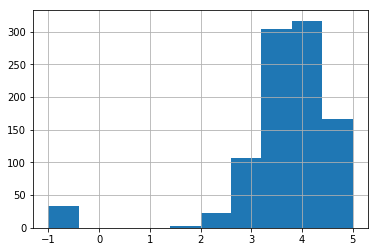

In [28]:
df.Rating.hist()
plt.show()

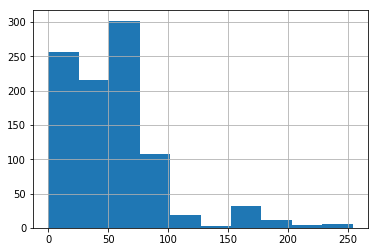

In [45]:
df.salario_avg.hist()
plt.show()

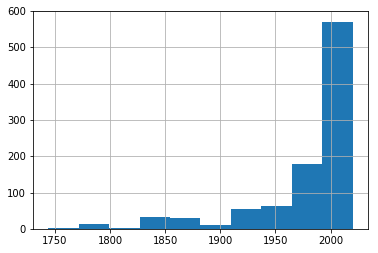

In [48]:
df.Founded.hist()
plt.show()

### Boxplot
---

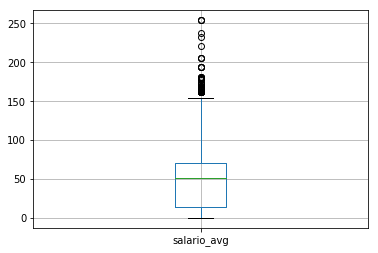

In [53]:
df.boxplot('salario_avg')
plt.show()

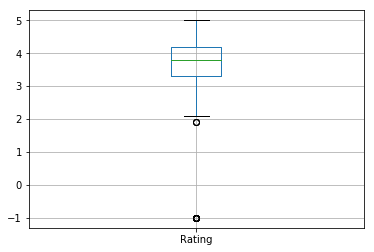

In [54]:
df.boxplot('Rating')
plt.show()

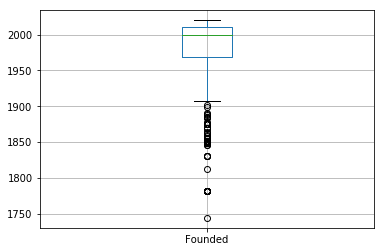

In [55]:
df.boxplot('Founded')
plt.show()

### Correlación
---

In [57]:
df.corr()

,Rating,Founded,salario_min,salario_max,python_yn,R_yn,spark,aws,excel,num_comp,salario_avg
Rating,1.000000,-0.038914,0.135869,0.027145,0.102566,0.012092,0.065454,0.080478,-0.021981,0.030364,0.080379
Founded,-0.038914,1.000000,-0.210916,-0.120484,0.085779,0.002793,0.075774,0.045501,-0.038629,-0.173536,-0.173964
salario_min,0.135869,-0.210916,1.000000,0.663751,0.253191,-0.016897,0.131707,0.033937,-0.019153,0.224393,0.882885
salario_max,0.027145,-0.120484,0.663751,1.000000,0.110222,0.009559,0.030411,0.005322,0.046006,0.192094,0.937247
python_yn,0.102566,0.085779,0.253191,0.110222,1.000000,0.031163,0.371526,0.165840,-0.042507,0.037551,0.187228
R_yn,0.012092,0.002793,-0.016897,0.009559,0.031163,1.000000,-0.017378,-0.018839,0.031822,-0.022368,-0.001875
spark,0.065454,0.075774,0.131707,0.030411,0.371526,-0.017378,1.000000,0.287587,-0.059187,0.037250,0.080490
aws,0.080478,0.045501,0.033937,0.005322,0.165840,-0.018839,0.287587,1.000000,-0.048242,-0.036117,0.019161
excel,-0.021981,-0.038629,-0.019153,0.046006,-0.042507,0.031822,-0.059187,-0.048242,1.000000,-0.028050,0.019956
num_comp,0.030364,-0.173536,0.224393,0.192094,0.037551,-0.022368,0.037250,-0.036117,-0.028050,1.000000,0.225206


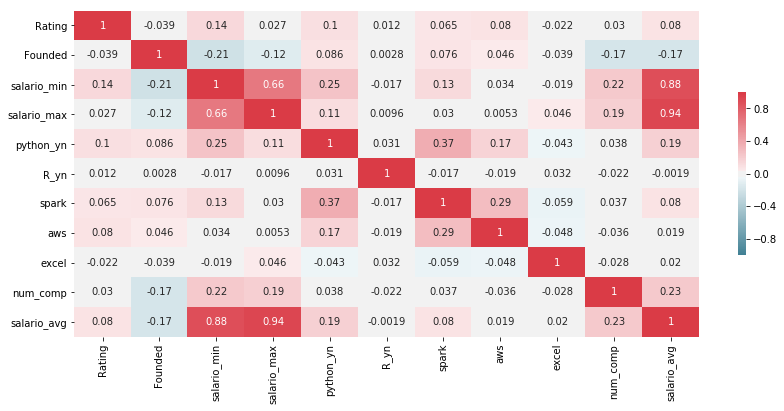

In [66]:
plt.figure(figsize= (14,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=1, vmin=-1,cmap=cmap,
            cbar_kws={"shrink": .5}, annot=True)
plt.show()

## Visulización de datos categoricos
---

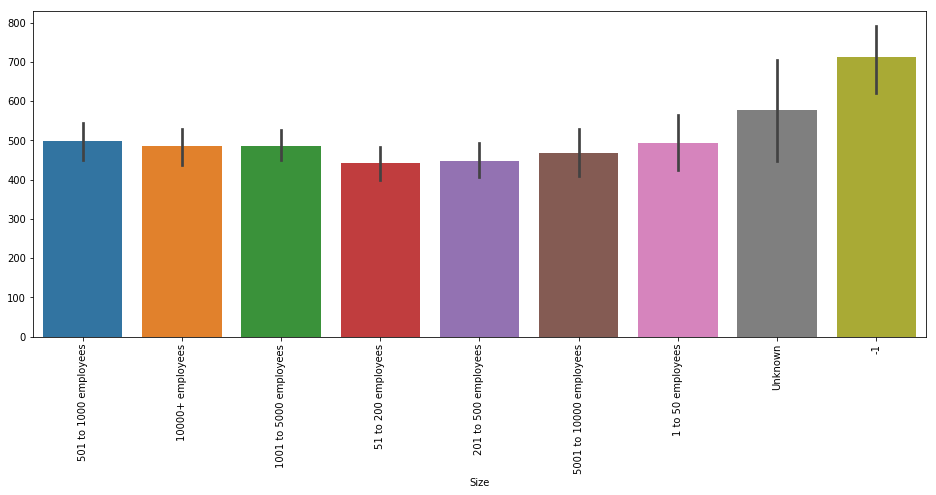

In [73]:
plt.figure(figsize=(16,6))
chart =sns.barplot(x = df., y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [72]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,spark,aws,excel,job_simp,seniority,num_comp,company,salario_avg
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,1,data scientist,na,0,Tecolote Research,71.5
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,data scientist,na,0,University of Maryland Medical System,32.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,data scientist,na,0,KnowBe4,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,data scientist,na,3,PNNL,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,1,data scientist,na,3,Affinity Solutions,64.5


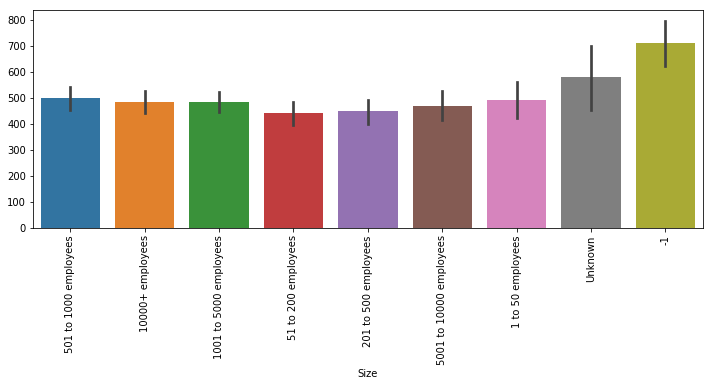

In [74]:
plt.figure(figsize=(12,4))
chart =sns.barplot(x = df.Size, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

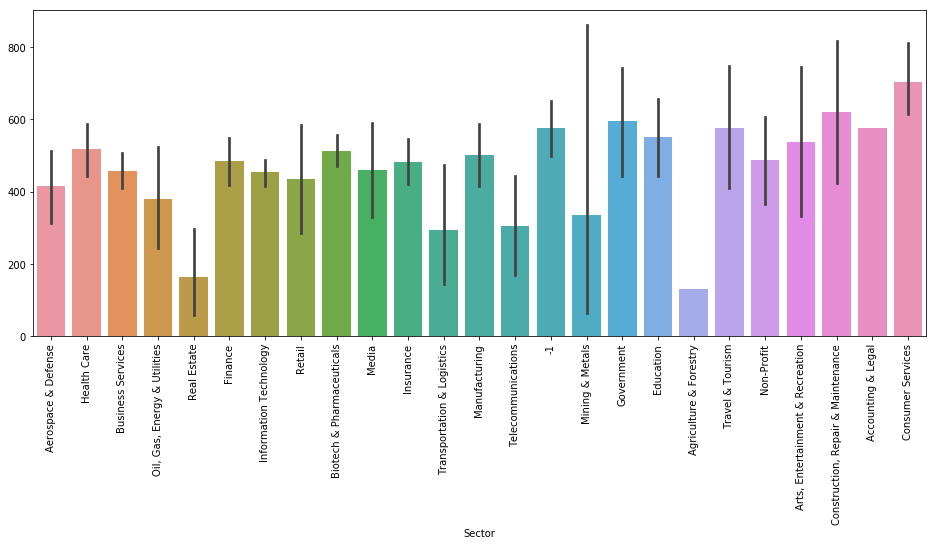

In [75]:
plt.figure(figsize=(16,6))
chart =sns.barplot(x = df.Sector, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

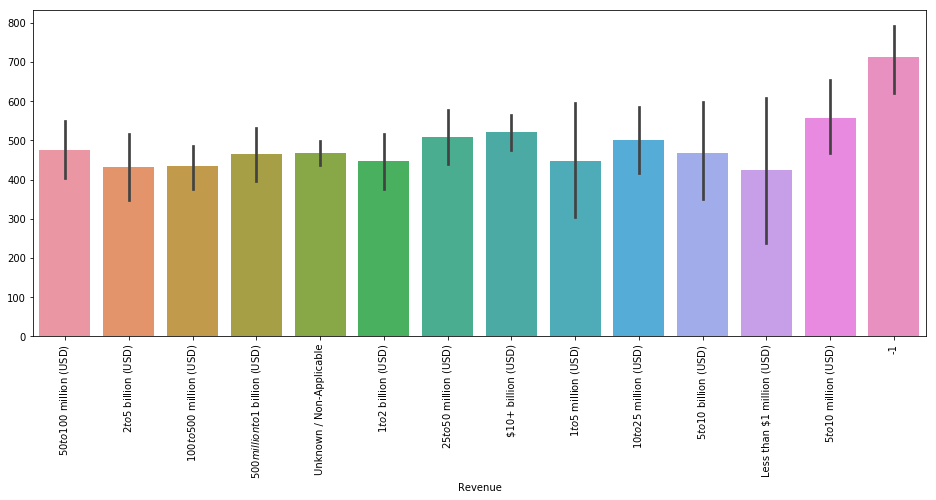

In [77]:
plt.figure(figsize=(16,6))
chart =sns.barplot(x = df.Revenue, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

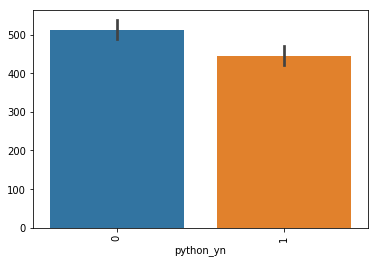

In [78]:
chart =sns.barplot(x = df.python_yn, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

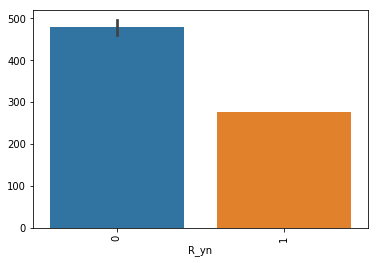

In [79]:
chart =sns.barplot(x = df.R_yn, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

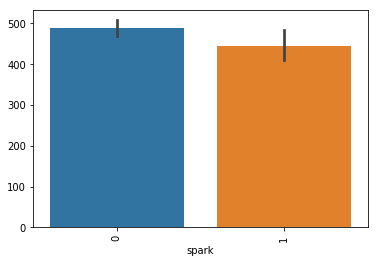

In [80]:
chart =sns.barplot(x = df.spark, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

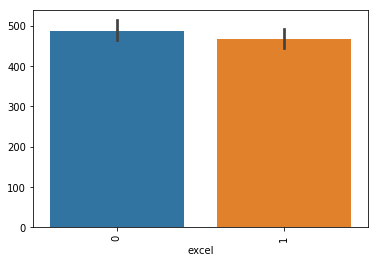

In [81]:
chart =sns.barplot(x = df.excel, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

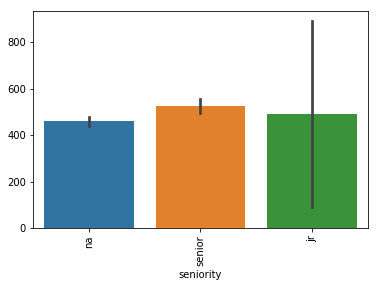

In [82]:
chart =sns.barplot(x = df.seniority, y = df.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

## Análisis de Variables
---

In [86]:
df.groupby('job_simp').salario_avg.mean()

job_simp
analyst            45.338710
data engineer      47.699367
data scientist     58.837989
director          128.781250
manager            38.569444
mle                71.403846
na                 41.050420
Name: salario_avg, dtype: float64

In [88]:
pd.pivot_table(df, index= 'job_simp', values= 'salario_avg')

,salario_avg
job_simp,
analyst,45.338710
data engineer,47.699367
data scientist,58.837989
director,128.781250
manager,38.569444
mle,71.403846
na,41.050420


In [94]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values='salario_avg').unstack()

salario_avg                       
seniority               jr          na     senior
job_simp                                         
analyst               56.5   42.317708  55.666667
data engineer          NaN   39.681416  67.833333
data scientist        56.5   49.534413  79.750000
director               NaN  147.178571   0.000000
manager                NaN   39.671429   0.000000
mle                    NaN   61.157895  99.214286
na                     NaN   35.518293  53.310811

In [100]:
salarios = df.groupby(['state', 'job_simp']).salario_avg.mean()
salarios.nlargest(20)

state  job_simp      
IL     director          221.750000
NJ     director          111.500000
CA     mle               104.562500
MA     director           84.500000
CA     data engineer      83.303571
IL     mle                83.000000
MN     analyst            76.000000
CA     data scientist     75.868132
NY     mle                75.000000
AZ     na                 74.500000
NM     data scientist     74.166667
OR     data engineer      73.000000
WA     data scientist     71.055556
LA     data engineer      70.500000
PA     mle                70.500000
UT     data scientist     67.875000
NC     data scientist     67.000000
NJ     analyst            66.916667
DC     data scientist     65.750000
AL     data engineer      65.000000
Name: salario_avg, dtype: float64

In [104]:
estados= pd.pivot_table(df, index='state', values='salario_avg')
estados.nlargest(20, 'salario_avg')

,salario_avg
state,
IL,74.166667
NM,74.166667
CA,66.273810
DC,63.041667
SC,60.500000
WA,59.600000
WI,58.300000
NC,57.452381
ID,56.250000


In [105]:
ratings = pd.pivot_table(df, index='Rating', values='salario_avg')
ratings.nlargest(10, 'salario_avg')

,salario_avg
Rating,
3.2,69.791667
3.9,69.739130
3.3,69.613636
3.5,69.160377
2.1,65.900000
3.7,64.420290
2.6,61.214286
4.0,58.035714
4.7,56.907895


In [107]:
industrias =df.groupby('Industry').salario_avg.mean()
industrias.nlargest(10)

Industry
Other Retail Stores                         163.000000
Financial Analytics & Research              107.500000
Brokerage Services                          104.000000
Wholesale                                   103.166667
Motion Picture Production & Distribution     96.000000
Health, Beauty, & Fitness                    89.000000
K-12 Education                               83.750000
Telecommunications Services                  81.500000
Auctions & Galleries                         77.500000
Internet                                     74.180556
Name: salario_avg, dtype: float64

In [109]:
sector = df.groupby('Sector').salario_avg.mean()
sector.nlargest(15)

Sector
Insurance                       69.140845
Telecommunications              69.000000
Accounting & Legal              63.500000
Travel & Tourism                63.125000
Consumer Services               62.250000
Education                       61.903846
Oil, Gas, Energy & Utilities    58.366667
Information Technology          58.131799
Biotech & Pharmaceuticals       56.027027
Retail                          54.937500
Mining & Metals                 54.000000
Real Estate                     53.500000
Finance                         50.803571
Aerospace & Defense             49.843750
Transportation & Logistics      49.312500
Name: salario_avg, dtype: float64

In [112]:
 df.groupby('Revenue').salario_avg.count()

Revenue
$1 to $2 billion (USD)               68
$1 to $5 million (USD)               17
$10 to $25 million (USD)             39
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$2 to $5 billion (USD)               44
$25 to $50 million (USD)             59
$5 to $10 billion (USD)              20
$5 to $10 million (USD)              29
$50 to $100 million (USD)            52
$500 million to $1 billion (USD)     62
-1                                   11
Less than $1 million (USD)            9
Unknown / Non-Applicable            299
Name: salario_avg, dtype: int64

In [120]:
df.groupby('num_comp').salario_avg.mean().sort_values(ascending= False)

num_comp
3    66.677866
2    65.410000
4    56.500000
0    44.689274
1    42.694444
Name: salario_avg, dtype: float64

In [123]:
df.groupby('excel').salario_avg.mean().sort_values(ascending=False)

excel
1    52.436214
0    50.668085
Name: salario_avg, dtype: float64

In [125]:
df.groupby('python_yn').salario_avg.mean().sort_values(ascending=False)

python_yn
1    59.553427
0    42.955435
Name: salario_avg, dtype: float64

In [106]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'city', 'state', 'Salary', 'salario_min', 'salario_max', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'num_comp',
       'company', 'salario_avg'],
      dtype='object')

In [139]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

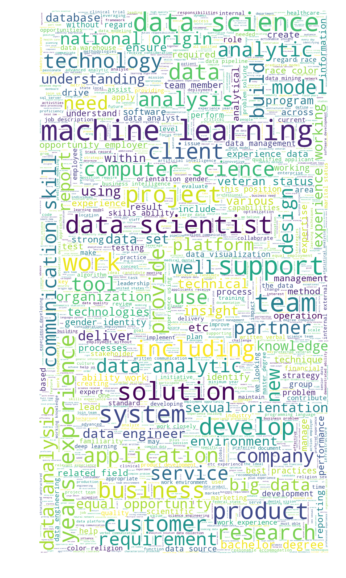

In [140]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()